## Synthetic data

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

from synthesize_data import synthesize_data
import expectation_reflection as ER
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(1)

In [3]:
def inference(X_train,y_train,X_test,y_test,method='expectation_reflection'):
    if method == 'expectation_reflection':
        h0,w = ER.fit(X_train,y_train,niter_max=100,regu=0.)
        y_pred = ER.predict(X_test,h0,w)
        y_pred_train = ER.predict(X_train,h0,w)

    else:
        if method == 'logistic_regression':
            model = LogisticRegression(solver='liblinear')

        if method == 'naive_bayes': 
            model = GaussianNB()

        if method == 'random_forest':
            model = RandomForestClassifier(criterion = "gini", random_state = 1,
                           max_depth=3, min_samples_leaf=5,n_estimators=100)   
            
        if method == 'decision_tree':
            model = DecisionTreeClassifier()  

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        
    accuracy = accuracy_score(y_test,y_pred)                
                  
    return accuracy

In [4]:
list_methods=['logistic_regression','naive_bayes','random_forest','decision_tree','expectation_reflection']
def compare_inference(X,y,train_size):
    npred = 10
    accuracy = np.zeros((len(list_methods),npred))
    precision = np.zeros((len(list_methods),npred))
    recall = np.zeros((len(list_methods),npred))
    accuracy_train = np.zeros((len(list_methods),npred))
    for ipred in range(npred):
        X, y = shuffle(X, y)
        X_train0,X_test,y_train0,y_test = train_test_split(X,y,test_size=0.2,random_state = ipred)

        #idx_train = np.random.choice(len(y_train0),size=int(train_size*len(y_train0)),replace=False)
        idx_train = np.random.choice(len(y_train0),size=int(train_size*len(y)),replace=False)
        X_train,y_train = X_train0[idx_train],y_train0[idx_train]

        for i,method in enumerate(list_methods):
            accuracy[i,ipred] = inference(X_train,y_train,X_test,y_test,method)
            
    return accuracy.mean(axis=1)

In [5]:
def plot_accuracy():
    plt.figure(figsize=(4,3))    
    plt.plot(list_train_size,acc[:,0],'k--',marker='o',mfc='none',label='Logistic Regression')
    plt.plot(list_train_size,acc[:,1],'b--',marker='s',mfc='none',label='Naive Bayes')
    plt.plot(list_train_size,acc[:,2],'r--',marker='^',mfc='none',label='Random Forest')
    #plt.plot(list_train_size,acc[:,3],'b--',label='Decision Tree')
    plt.plot(list_train_size,acc[:,4],'k-',marker='o',label='Expectation Reflection')
    plt.xlabel('train size')
    plt.ylabel('accuracy')
    plt.legend()

### Binary variables

In [6]:
l = 10000 ; n = 40 ; g = 4.

In [7]:
X,y = synthesize_data(l,n,g,data_type='binary')

In [8]:
np.unique(y,return_counts=True)

(array([-1.,  1.]), array([4954, 5046]))

In [9]:
list_train_size = [0.8,0.6,0.4,0.2,0.1]
acc = np.zeros((len(list_train_size),len(list_methods)))
for i,train_size in enumerate(list_train_size):
    acc[i,:] = compare_inference(X,y,train_size)
    print(train_size,acc[i,:])

0.8 [0.98715 0.9647  0.82925 0.74705 0.9869 ]
0.6 [0.9875  0.9603  0.82415 0.7337  0.9873 ]
0.4 [0.9851  0.9566  0.8278  0.7216  0.98535]
0.2 [0.97945 0.93905 0.8261  0.7182  0.9807 ]
0.1 [0.9684 0.9214 0.8277 0.6918 0.9729]


In [10]:
df = pd.DataFrame(acc,columns = list_methods)
df.insert(0, "train_size",list_train_size, True)
df

,train_size,logistic_regression,naive_bayes,random_forest,decision_tree,expectation_reflection
0,0.8,0.98715,0.96470,0.82925,0.74705,0.98690
1,0.6,0.98750,0.96030,0.82415,0.73370,0.98730
2,0.4,0.98510,0.95660,0.82780,0.72160,0.98535
3,0.2,0.97945,0.93905,0.82610,0.71820,0.98070
4,0.1,0.96840,0.92140,0.82770,0.69180,0.97290


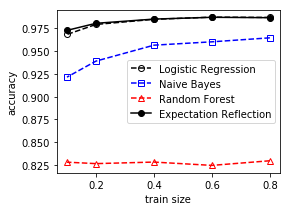

In [11]:
plot_accuracy()

### Continuous variables

In [12]:
l = 10000 ; n = 40 ; g = 4.

In [13]:
X,y = synthesize_data(l,n,g,data_type='continuous')

In [14]:
np.unique(y,return_counts=True)

(array([-1.,  1.]), array([5006, 4994]))

In [15]:
for i,train_size in enumerate(list_train_size):
    acc[i,:] = compare_inference(X,y,train_size)
    print(train_size,acc[i,:])

0.8 [0.9784  0.95985 0.8049  0.6972  0.98105]
0.6 [0.97475 0.9576  0.80945 0.6956  0.9793 ]
0.4 [0.97315 0.94895 0.8121  0.68305 0.9767 ]
0.2 [0.9668  0.939   0.81055 0.67355 0.97485]
0.1 [0.9555  0.91795 0.8035  0.653   0.9656 ]


In [16]:
df = pd.DataFrame(acc,columns = list_methods)
df.insert(0, "train_size",list_train_size, True)
df

,train_size,logistic_regression,naive_bayes,random_forest,decision_tree,expectation_reflection
0,0.8,0.97840,0.95985,0.80490,0.69720,0.98105
1,0.6,0.97475,0.95760,0.80945,0.69560,0.97930
2,0.4,0.97315,0.94895,0.81210,0.68305,0.97670
3,0.2,0.96680,0.93900,0.81055,0.67355,0.97485
4,0.1,0.95550,0.91795,0.80350,0.65300,0.96560


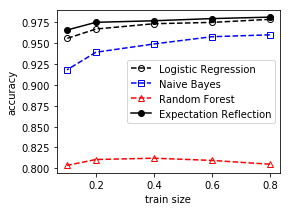

In [17]:
plot_accuracy()

### Categorical variables

In [18]:
l = 10000 ; n = 40 ; g = 4.

In [19]:
X,y = synthesize_data(l,n,g,data_type='categorical')

In [20]:
np.unique(y,return_counts=True)

(array([-1.,  1.]), array([5093, 4907]))

In [21]:
for i,train_size in enumerate(list_train_size):
    acc[i,:] = compare_inference(X,y,train_size)
    print(train_size,acc[i,:])

0.8 [0.97805 0.9443  0.7635  0.6283  0.9782 ]
0.6 [0.9749  0.93305 0.75605 0.6208  0.97525]
0.4 [0.9693  0.92305 0.7704  0.6174  0.96995]
0.2 [0.95635 0.8947  0.7606  0.60675 0.9594 ]
0.1 [0.9271  0.85305 0.736   0.5946  0.9321 ]


In [22]:
df = pd.DataFrame(acc,columns = list_methods)
df.insert(0, "train_size",list_train_size, True)
df

,train_size,logistic_regression,naive_bayes,random_forest,decision_tree,expectation_reflection
0,0.8,0.97805,0.94430,0.76350,0.62830,0.97820
1,0.6,0.97490,0.93305,0.75605,0.62080,0.97525
2,0.4,0.96930,0.92305,0.77040,0.61740,0.96995
3,0.2,0.95635,0.89470,0.76060,0.60675,0.95940
4,0.1,0.92710,0.85305,0.73600,0.59460,0.93210


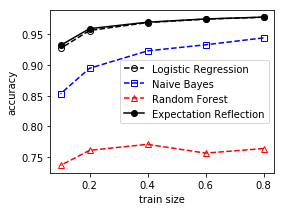

In [23]:
plot_accuracy()